<a href="https://colab.research.google.com/github/41y08h/colab-notebooks/blob/main/Linear_Regression_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import pandas as pd

In [ ]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2022-10-30 10:12:06--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2022-10-30 10:12:06 (28.8 MB/s) - ‘moore.csv’ saved [2302/2302]



In [ ]:
df = pd.read_csv('moore.csv')
df

,1971,2300
0,1972,3500
1,1973,2500
2,1973,2500
3,1974,4100
4,1974,4500
...,...,...
156,2017,18000000000
157,2017,19200000000
158,2018,8876000000
159,2018,23600000000


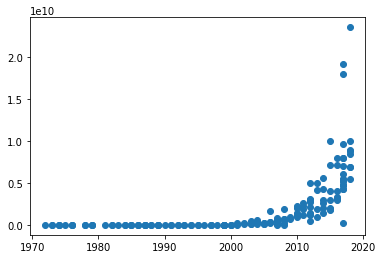

In [ ]:

X, y = df['1971'], df['2300']
plt.scatter(X, y);

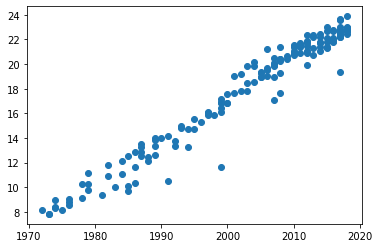

In [ ]:
plt.scatter(X, np.log(y));

In [ ]:
X, y = X - X.mean(), np.log(y)

In [ ]:
X

0     -30.391304
1     -29.391304
2     -29.391304
3     -28.391304
4     -28.391304
         ...    
156    14.608696
157    14.608696
158    15.608696
159    15.608696
160    15.608696
Name: 1971, Length: 161, dtype: float64

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Input(shape=(1,)),
  tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')

def schedule(epoch, learning_rate):
  if epoch>50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [ ]:
r = model.fit(X, y, epochs=200, callbacks=[scheduler]);

Epoch 1/200
6/6 [==============================] - 0s 3ms/step - loss: 1.0679 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 3ms/step - loss: 0.9010 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 3ms/step - loss: 0.9061 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 3ms/step - loss: 0.9754 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 3ms/step - loss: 1.0354 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 3ms/step - loss: 1.0044 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 3ms/step - loss: 0.9303 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 3ms/step - loss: 1.1178 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 3ms/step - loss: 1.0584 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 3ms/step - loss: 1.0361 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 3ms/step - loss: 1.0857 - lr: 0.00

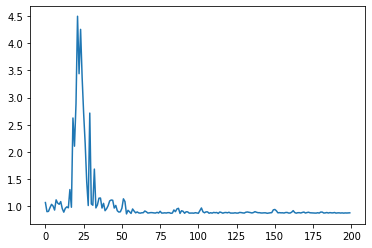

In [ ]:
plt.plot(r.history['loss'], label='loss');

In [ ]:
w = model.layers[0].get_weights()[0]
log_r = w[0,0]
log_r

0.34294412

## Time to double (years)

In [ ]:
np.log(2)/log_r

2.0211665674765795